# Data Science 1, Winter Semester 2021/22
---
# Exercise Sheet 1: Fundamentals

If you want to run this notebook, don't forget to either manually install all required packages or to use the file `requirements.txt` as described in the setup instructions.

## a) Loading

Let's load the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print('Data type:', type(iris))
print('Attributes:', iris.keys())

Data type: <class 'sklearn.utils.Bunch'>
Attributes: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The loaded data is not directly in tabular form yet (as one would expect), but a kind of [dictionary](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html) with multiple attributes:
The object doesn't only store the dataset itself, but also some meta-data.
The feature values (`data`) and the target variable (`target`) are separated at the moment.
Also, the target is stored numerically, with a mapping to strings provided by `feature_names`:

In [2]:
print('Target values:', iris.target)
print('Target names:', iris.target_names)

Target values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target names: ['setosa' 'versicolor' 'virginica']


Let's create a `DataFrame` containing the full dataset and view the first few rows:

In [3]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # without target variable (yet)
iris_df['species'] = pd.Series(data=iris.target).replace({i: name for i, name in enumerate(iris.target_names)})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


There are four numeric features describing the flower.
The target is a categorical attribute containing the name of the species.

As argument for `replace()`, we used a dictionary comprehension.
This is a shortcut for defining a dictionary with a loop:

In [4]:
print('Result of comprehension:', {i: name for i, name in enumerate(iris.target_names)})
mapping = dict()
for i, name in enumerate(iris.target_names):
    mapping[i] = name
print('Result of loop:         ', mapping)

Result of comprehension: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Result of loop:          {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


## b) Descriptive Statistics

To get an impression of some key charateristics of a dataset, `describe()` and `info()` are helpful:

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


`describe()` computes multiple summaries, which you can also compute with individual functions.
Note that it only summarizes the numeric features here, as it cannot use the same statistics to describe the categorical target.
If all columns were categorical, a different kind of summary would be shown.

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This info describes all columns and tells us the data types.

Let's compute a specific statistic for all numeric columns:

In [7]:
iris_df.drop(columns='species').mean().round(2)

sepal length (cm)    5.84
sepal width (cm)     3.06
petal length (cm)    3.76
petal width (cm)     1.20
dtype: float64

As you can see, operations on `DataFrame`s often return the modified `DataFrame`, so you can easily chain method calls.
By the way, aggregation methods of `DataFrame` work column-wise by default (i.e., aggregate over rows), but you can also aggregate over columns with `.mean(axis='columns')`.

Additionally, we can compute statistics on an individual column, which is a `pandas.Series`:

In [8]:
print('Type of column object:', type(iris_df['sepal length (cm)']))
print('Mean:', iris_df['sepal length (cm)'].mean())

Type of column object: <class 'pandas.core.series.Series'>
Mean: 5.843333333333334


Let's also summarize the target variable, which is non-numeric:

In [9]:
summary = iris_df['species'].value_counts()
print(summary)
print('Type of summary object:', type(summary))

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
Type of summary object: <class 'pandas.core.series.Series'>


If an aggregation function returns multiple values, they are put into a `pandas` object (`Series` or `DataFrame`) as well.

## c) Distribution Plots

Let's plot one of the features in a quick-and-dirty histogram:

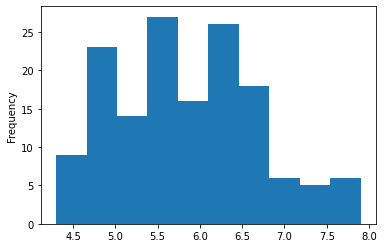

In [10]:
import matplotlib.pyplot as plt

iris_df['sepal length (cm)'].plot.hist()
plt.show()

By default, `matplotlib` is the plotting backend for `pandas`, but that can be changed.
We can also call the plot function from `matplotlib` directly (instead of calling the plot routine of the `DataFrame` / `Series`).
Let's do this and also apply some more formatting (different color, transparency, separation between bars, labeling):

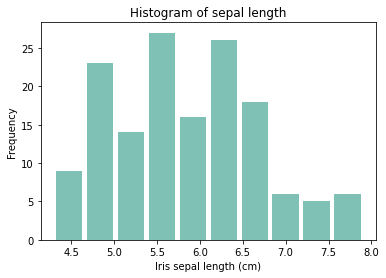

In [11]:
plt.hist(x=iris_df['sepal length (cm)'], color='#00876C', alpha=0.5, rwidth=0.85)
plt.xlabel('Iris sepal length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of sepal length')
plt.show()

The number of bins is the default value of 10 here, which is not always a good fit.
There are several ways to change the binning (see the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).
The simplest way is just passing an integer value for `bins`:

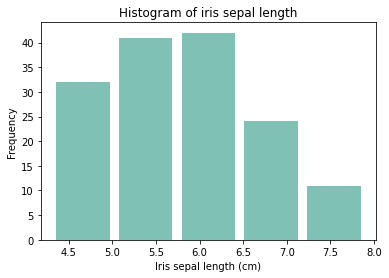

In [12]:
plt.hist(x=iris_df['sepal length (cm)'], bins=5, color='#00876C', alpha=0.5, rwidth=0.85)
plt.xlabel('Iris sepal length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of iris sepal length')
plt.show()

Let's also try `seaborn`, just for fun.
`seaborn` depends on `matplotlib`, but adds some further high-level plotting functionality.

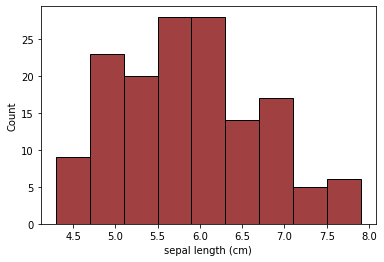

In [13]:
import seaborn as sns

sns.histplot(data=iris_df['sepal length (cm)'], color='maroon')
plt.show()

Besides histograms, boxplots are quite popular to display the distribution of numeric features:

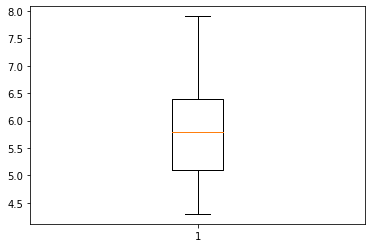

In [14]:
plt.boxplot(iris_df['sepal length (cm)'])
plt.show()

Won't win a beauty contest, but is easy to create.

Simultaneous boxplots of all numeric features of the `DataFrame` - why not?
(Also, rotate the axis labels to avoid overlap.)

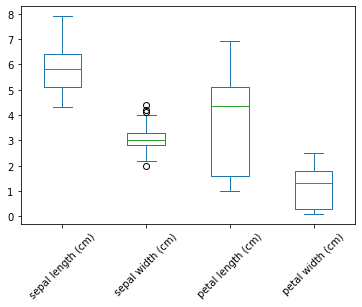

In [15]:
iris_df.plot.box()
plt.xticks(rotation=45)
plt.show()

`seaborn`'s default boxplots look better:

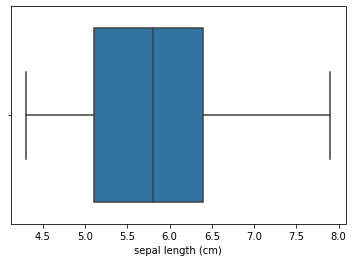

In [16]:
sns.boxplot(x=iris_df['sepal length (cm)'])
plt.show()

## d) Scatter Plots

A scatter plot of two features against each other, colored by the target variable (which we need to encode with integers via `pd.factorize()`):

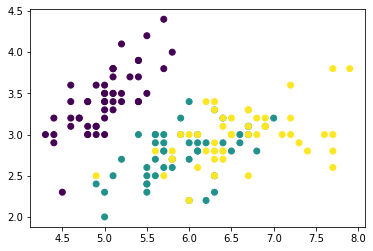

In [17]:
plt.scatter(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], c=pd.factorize(iris_df['species'])[0])
plt.show()

Let's try `seaborn` as well:

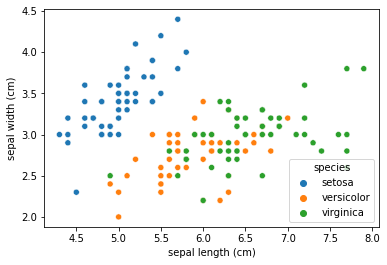

In [18]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.show()

Again, `seaborn` is slightly more user-friendly and the default result looks better.

## e) Grouped Boxplots

First, let's try a grouped boxplot for one feature:

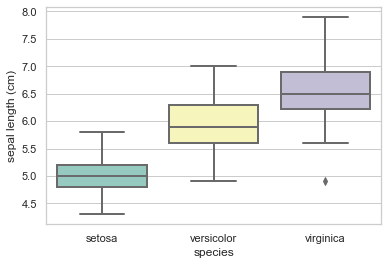

In [19]:
sns.set_theme(style='whitegrid')  # no grey background
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', linewidth=2.0, palette='Set3')  # change color palette
plt.show()

By the way, you can find infos on the color palettes in [`matplotlib` here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and in [`seaborn` here](https://seaborn.pydata.org/tutorial/color_palettes.html).

To display one such boxplot for each feature in the dataset, we first create four subplots.
Then, using a loop, we assign individual figures to the subplots:

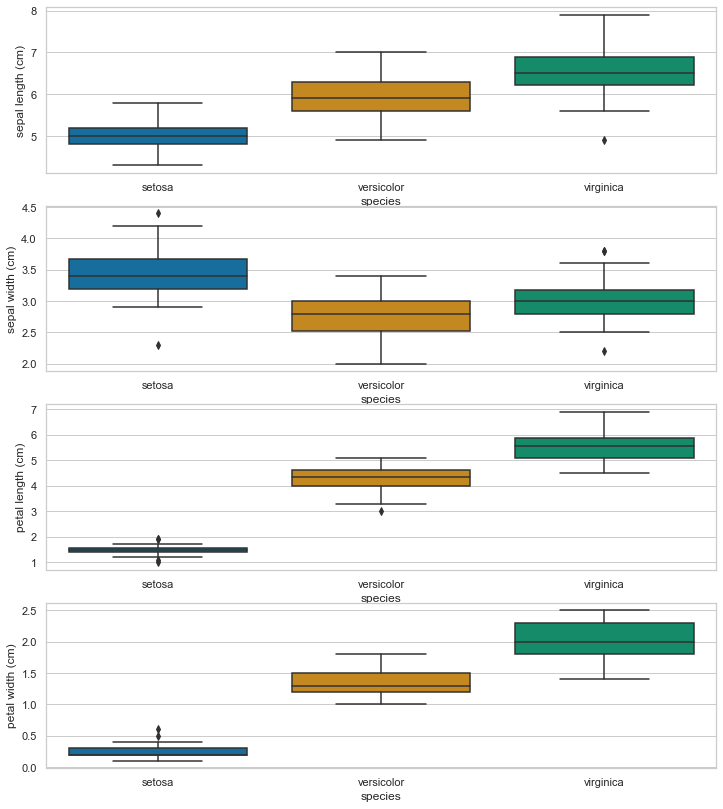

In [20]:
fig, axs = plt.subplots(nrows=4, figsize=(12, 14))

for idx, feature in enumerate(iris_df.select_dtypes(float).columns):
    sns.boxplot(ax=axs[idx], x='species', y=feature, data=iris_df, palette='colorblind')
plt.show()

## f) $\chi^2$ Test

The null hypothesis for the $\chi^2$ test (as defined in the lecture) is that two random variables are independent.
To check the output structure of the test's function, we first run it for one feature.
Don't forget to discretize the features, as the test is intended for categorical variables.

We start with a contingency table:

In [21]:
sepal_intervals = pd.cut(iris_df['sepal length (cm)'], bins=3)  # discretize
contingency_table = pd.crosstab(sepal_intervals, iris_df['species'])
contingency_table

species,setosa,versicolor,virginica
sepal length (cm),,,
"(4.296, 5.5]",47,11,1
"(5.5, 6.7]",3,36,32
"(6.7, 7.9]",0,3,17


Let's check use the contigency table for a $\chi^2$ test:

In [22]:
import scipy.stats as scs

scs.chi2_contingency(contingency_table)

(111.63387443303891,
 3.2620453090172096e-23,
 4,
 array([[19.66666667, 19.66666667, 19.66666667],
        [23.66666667, 23.66666667, 23.66666667],
        [ 6.66666667,  6.66666667,  6.66666667]]))

The return values [are](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html):
- $\chi^2$ test statistic
- p-value
- degrees of freedom
- a matrix containing the expected frequencies for the case of independence

Due to the low p-value, we reject the null hypothesis that the two random variables are independent.

For comparison, here is the result of a $\chi^2$ test with two independent variables:

In [23]:
import random

random.seed(25)
rnd_vector = pd.Series(random.choices(['a', 'b', 'c'], k=len(iris_df)))
scs.chi2_contingency(pd.crosstab(rnd_vector, iris_df['species']))

(2.3657058388765706,
 0.6688334392590689,
 4,
 array([[18.33333333, 18.33333333, 18.33333333],
        [18.        , 18.        , 18.        ],
        [13.66666667, 13.66666667, 13.66666667]]))

`rnd_vector` is a vector sampled uniformly from three different values.
Note the high p-value (2nd component of the result), which tells us that we cannot reject the null hypothesis.
However, note that the independence test does not truly proof that the variables are independent in such cases.

Let's use a loop to apply the $\chi^2$ test to all features and store the results in a `DataFrame`:

In [24]:
test_statistics = {}
p_values = {}

for feature in iris_df.columns:
    if feature == 'species':
        continue
    discretized_attr = pd.cut(iris_df[feature], bins=3)
    contingency_table = pd.crosstab(discretized_attr, iris_df['species'])
    chi2_outcome = scs.chi2_contingency(contingency_table)

    test_statistics[feature] = chi2_outcome[0]
    p_values[feature] = chi2_outcome[1]

pd.DataFrame(data={'test_statistic': test_statistics, 'p_value': p_values})

,test_statistic,p_value
sepal length (cm),111.633874,3.262045e-23
sepal width (cm),45.124662,3.745610e-09
petal length (cm),256.521739,2.561410e-54
petal width (cm),266.908213,1.479763e-56


From the theoretical perspective, a higher $\chi^2$ test statistic means that the independency hypothesis is "rejected more strongly".
Informally speaking, one we can interpret this as a higher degree of dependence.
Note that a higher test statistic corresponds to a lower p-value.

Given the low p-values, we can conclude that all features are not independent from the target variable.
This is also what we see in the plots for sub-task e):
Feature values clearly vary between `species`.

Further, note that `petal length (cm)` and `petal width (cm)`, where the values have the best separation (least overlap) between `species`, also have the highest test statistics / lowest p-values.
Thus, $\chi^2$ tests are useful in classification problems to find out which featurees are most suitable to discriminate between classes.
Such an approach is implemented in [sklearn.feature_selection.chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html).